Video Game Analysis


Data Prepocessing

In [81]:
import numpy as np
import pandas as pd

videogame_sales_2024_df = pd.read_csv("vgchartz-2024.csv", sep=',', decimal='.')
videogame_sales_2024_df_cleaned = videogame_sales_2024_df.drop_duplicates()
videogame_sales_2024_df_cleaned["release_date"] = pd.to_datetime(videogame_sales_2024_df_cleaned["release_date"])
videogame_sales_2024_df_cleaned = videogame_sales_2024_df_cleaned[videogame_sales_2024_df_cleaned["release_date"] < pd.to_datetime("2017-01-01")]
videogame_sales_2024_df_cleaned = videogame_sales_2024_df_cleaned[["title" ,"console", "genre", "total_sales", "na_sales", "jp_sales", "pal_sales","other_sales","release_date", "critic_score"]]
videogame_sales_2024_df_cleaned["na_sales"] = videogame_sales_2024_df_cleaned["na_sales"].fillna(videogame_sales_2024_df_cleaned["na_sales"].mean())
videogame_sales_2024_df_cleaned["jp_sales"] = videogame_sales_2024_df_cleaned["jp_sales"].fillna(videogame_sales_2024_df_cleaned["jp_sales"].mean())
videogame_sales_2024_df_cleaned["pal_sales"] = videogame_sales_2024_df_cleaned["pal_sales"].fillna(videogame_sales_2024_df_cleaned["pal_sales"].mean())
videogame_sales_2024_df_cleaned["other_sales"] = videogame_sales_2024_df_cleaned["other_sales"].fillna(videogame_sales_2024_df_cleaned["other_sales"].mean())
videogame_sales_2024_df_cleaned = videogame_sales_2024_df_cleaned[videogame_sales_2024_df_cleaned["genre"] != "Misc"] #Too many Nan data
videogame_sales_2024_df_cleaned['year'] = videogame_sales_2024_df_cleaned['release_date'].dt.year
videogame_sales_2024_df_cleaned['year'].dropna()


0        2013
1        2014
2        2002
3        2013
4        2015
         ... 
63999    2016
64004    2012
64006    2015
64007    2015
64011    2016
Name: year, Length: 41742, dtype: int32

Graphs

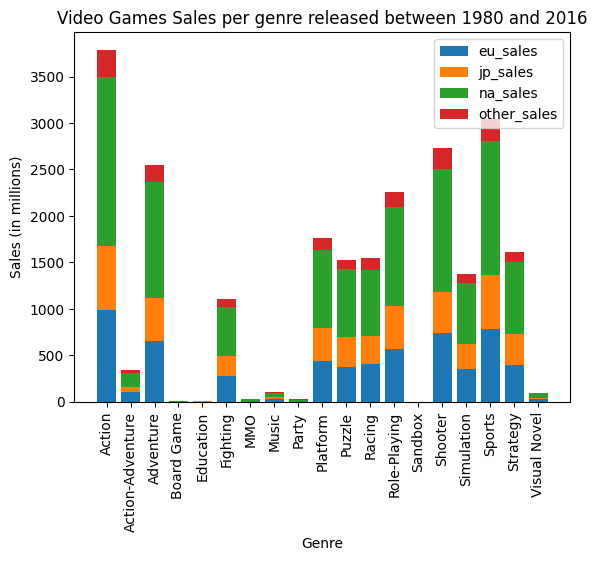

In [47]:
import matplotlib.pyplot as plt
videogame_sales_2024_df_cleaned = videogame_sales_2024_df_cleaned.dropna(subset=['genre'])
salesPerGenre = videogame_sales_2024_df_cleaned[["genre", "jp_sales", "na_sales", "pal_sales", "other_sales"]]
salesPerGenre = salesPerGenre.groupby(["genre"]).sum().reset_index()

plt.bar(salesPerGenre["genre"], salesPerGenre["pal_sales"], label="eu_sales")
plt.bar(salesPerGenre["genre"], salesPerGenre["jp_sales"], bottom = salesPerGenre["pal_sales"], label="jp_sales")
plt.bar(salesPerGenre["genre"], salesPerGenre["na_sales"], bottom = salesPerGenre["pal_sales"] + salesPerGenre["jp_sales"], label="na_sales")
plt.bar(salesPerGenre["genre"], salesPerGenre["other_sales"], bottom = salesPerGenre["pal_sales"] + salesPerGenre["jp_sales"] + salesPerGenre["na_sales"], label="other_sales")

plt.xticks(rotation=90)
plt.legend(loc="upper right")
plt.title("Video Games Sales per genre released between 1980 and 2016")
plt.ylabel("Sales (in millions)")
plt.xlabel("Genre")
plt.show()

Text(0, 0.5, 'Total Sales (in millions)')

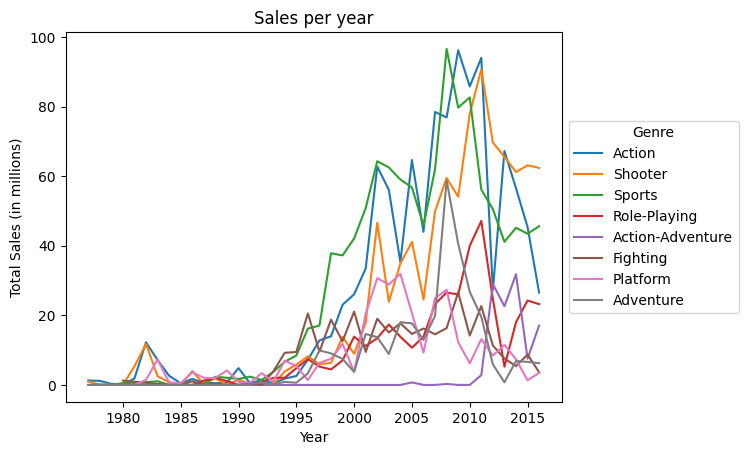

In [82]:

genreOnGraph = ["Action", "Action-Adventure", "Adventure", "Fighting", "Platform", "Role-Playing", "Shooter", "Sports"]

plt.figure()

for genre in videogame_sales_2024_df_cleaned["genre"].unique():
    if genre in genreOnGraph:
        salesPerYear = videogame_sales_2024_df_cleaned[videogame_sales_2024_df_cleaned["genre"] == genre]
        salesPerYear = salesPerYear.groupby("year")["total_sales"].sum()
        plt.plot(salesPerYear.index, salesPerYear.values, label=genre)


plt.legend(title = "Genre",loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Sales per year")
plt.xlabel('Year')
plt.ylabel('Total Sales (in millions)')


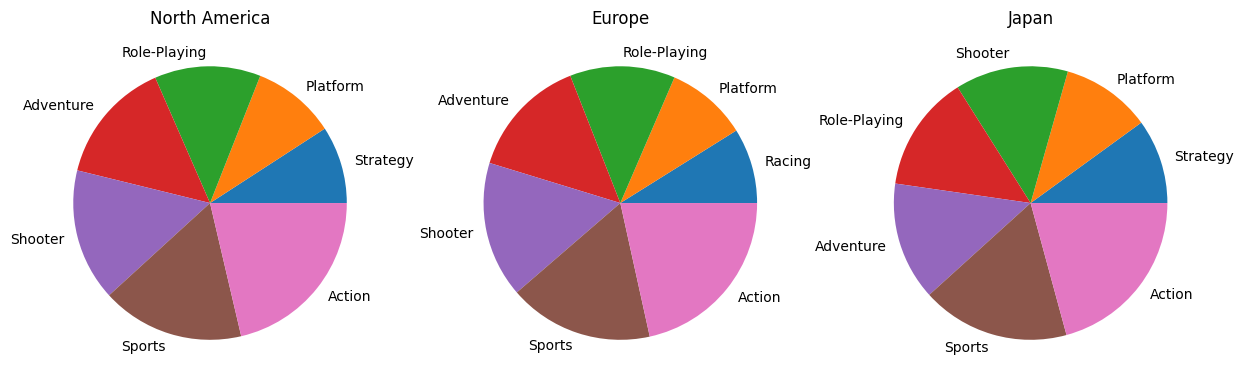

In [83]:
import matplotlib.pyplot as plt
videogame_sales_2024_df_cleaned = videogame_sales_2024_df_cleaned.dropna(subset=['genre'])
salesPerGenre = videogame_sales_2024_df_cleaned[["genre", "jp_sales", "na_sales", "pal_sales"]]
salesPerGenre = salesPerGenre.groupby(["genre"]).sum().reset_index()
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

salesPerGenre = salesPerGenre.sort_values(by = "na_sales")
axes[0].pie(salesPerGenre["na_sales"].tail(7), labels = salesPerGenre["genre"].tail(7))
axes[0].set_title('North America')

salesPerGenre = salesPerGenre.sort_values(by = "pal_sales")
axes[1].pie(salesPerGenre["pal_sales"].tail(7), labels = salesPerGenre["genre"].tail(7))
axes[1].set_title('Europe')

salesPerGenre = salesPerGenre.sort_values(by = "jp_sales")
axes[2].pie(salesPerGenre["jp_sales"].tail(7), labels = salesPerGenre["genre"].tail(7))
axes[2].set_title('Japan')

plt.show()


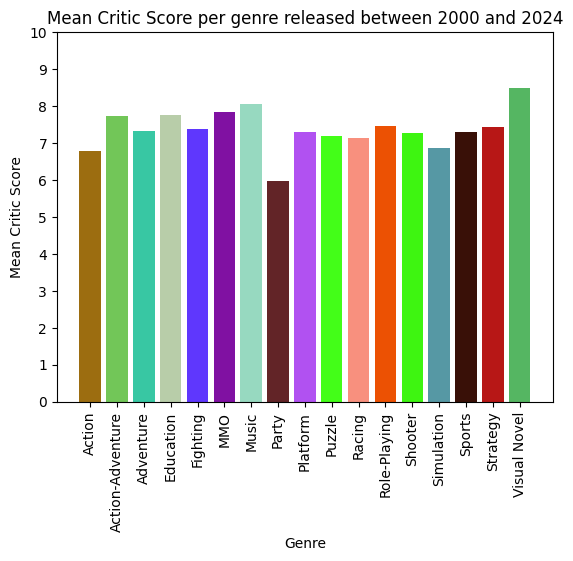

In [73]:
import matplotlib.pyplot as plt
import random

criticScorePerGenre = videogame_sales_2024_df_cleaned.dropna(subset=['critic_score', 'genre'])
criticScorePerGenre = criticScorePerGenre[["genre", "critic_score"]]
criticScorePerGenre = criticScorePerGenre.groupby(["genre"]).mean().reset_index()
colors = [(random.random(), random.random(), random.random()) for genre in criticScorePerGenre["genre"].unique()]
plt.bar(criticScorePerGenre["genre"], criticScorePerGenre["critic_score"], label="critic_score", color = colors)
plt.xticks(rotation=90)
plt.yticks(range(0,11,1))
plt.xlabel("Genre")
plt.ylabel("Mean Critic Score")
plt.title("Mean Critic Score per genre released between 2000 and 2024")
plt.show()

Text(0, 0.5, 'Sales (in millions)')

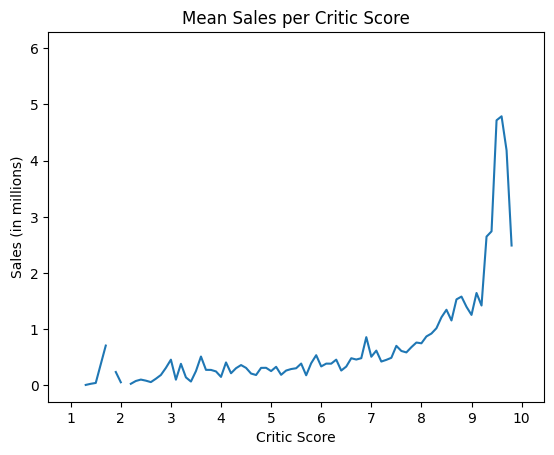

In [84]:
SalesPerCriticScore = videogame_sales_2024_df_cleaned[["total_sales", "critic_score"]]
SalesPerCriticScore = SalesPerCriticScore.groupby("critic_score").mean().reset_index()

plt.plot(SalesPerCriticScore["critic_score"], SalesPerCriticScore["total_sales"])
plt.xticks(range(1, 11, 1))
plt.title("Mean Sales per Critic Score")
plt.xlabel("Critic Score")
plt.ylabel("Sales (in millions)")